/job:localhost/replica:0/task:0/device:CPU:0 /job:localhost/replica:0/task:0/device:CPU:0
/job:localhost/replica:0/task:0/device:GPU:0 /job:localhost/replica:0/task:0/device:GPU:0
warmup: 0.0009522999998807791 0.5807824999999411
run time: 0.0050395999999182095 0.006941199999801029
/job:localhost/replica:0/task:0/device:CPU:0 /job:localhost/replica:0/task:0/device:CPU:0
/job:localhost/replica:0/task:0/device:GPU:0 /job:localhost/replica:0/task:0/device:GPU:0
warmup: 0.00042129999997087 0.001010599999972328
run time: 0.006495000000086293 0.007322899999962829
/job:localhost/replica:0/task:0/device:CPU:0 /job:localhost/replica:0/task:0/device:CPU:0
/job:localhost/replica:0/task:0/device:GPU:0 /job:localhost/replica:0/task:0/device:GPU:0
warmup: 0.0006438999998863437 0.0011617000000114786
run time: 0.0043306999998549145 0.008929099999932077
/job:localhost/replica:0/task:0/device:CPU:0 /job:localhost/replica:0/task:0/device:CPU:0
/job:localhost/replica:0/task:0/device:GPU:0 /job:localhost/re

C:\Users\kevin\AppData\Local\Temp\ipykernel_24428\802011737.py:63: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim([0,100])


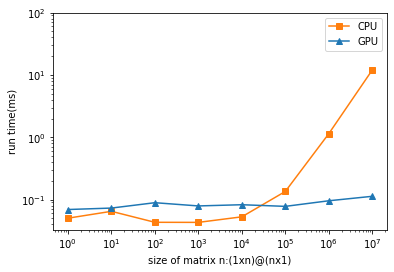

In [6]:
import  numpy as np
import  matplotlib
from    matplotlib import pyplot as plt
plt.close()
# Default parameters for plots
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.titlesize'] = 20
matplotlib.rcParams['figure.figsize'] = [9, 7]
# matplotlib.rcParams['font.family'] = ['KaiTi']
matplotlib.rcParams['axes.unicode_minus']=False 

import tensorflow as tf
import timeit
iteration = 8
cpu_data = []
gpu_data = []
for n in range(iteration):
	n = 10**n
	# 创建在CPU上运算的2个矩阵
	with tf.device('/cpu:0'):
		cpu_a = tf.random.normal([1, n])
		cpu_b = tf.random.normal([n, 1])
		print(cpu_a.device, cpu_b.device)
	
	# 创建使用GPU运算的2个矩阵
	with tf.device('/gpu:0'):
		gpu_a = tf.random.normal([1, n])
		gpu_b = tf.random.normal([n, 1])
		print(gpu_a.device, gpu_b.device)

	def cpu_run():
		with tf.device('/cpu:0'):
			c = tf.matmul(cpu_a, cpu_b)
		return c 

	def gpu_run():
		with tf.device('/gpu:0'):
			c = tf.matmul(gpu_a, gpu_b)
		return c 

	# 第一次计算需要热身，避免将初始化阶段时间结算在内
	cpu_time = timeit.timeit(cpu_run, number=10)
	gpu_time = timeit.timeit(gpu_run, number=10)
	print('warmup:', cpu_time, gpu_time)
	# 正式计算100次，取平均时间
	cpu_time = timeit.timeit(cpu_run, number=100)
	gpu_time = timeit.timeit(gpu_run, number=100)
	print('run time:', cpu_time, gpu_time)
	cpu_data.append(cpu_time/100)
	gpu_data.append(gpu_time/100)

	del cpu_a,cpu_b,gpu_a,gpu_b

x = [10**i for i in range(iteration)]
cpu_data = [1000*i for i in cpu_data]
gpu_data = [1000*i for i in gpu_data]
plt.plot(x, cpu_data, color='C1', marker='s', label='CPU')
plt.plot(x, gpu_data, color='C0', marker='^', label='GPU')


plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.ylim([0,100])
plt.xlabel(r'size of matrix n:(1xn)@(nx1)')
plt.ylabel(r'run time(ms)')
plt.legend()
# plt.savefig('gpu-time.svg')
plt.show()
